# Import

In [1]:
# Import the csv data into a dataframe and look at the first 10 rows

import pandas as pd
df = pd.read_csv('/Users/thomasmulhern/Downloads/Data-Analyst-Take-Home-Challenge-Dataset.csv', )
df.loc[:10]

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks
0,2022-05-31,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.76,71.0,207.0,1.0
1,2022-06-07,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,6.40,45.0,225.0,1.0
2,2022-06-20,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.21,78.0,299.0,1.0
3,2022-06-29,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.74,90.0,283.0,0.0
4,2022-06-13,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.22,72.0,249.0,1.0
5,2022-06-14,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.10,57.0,216.0,1.0
6,2022-06-18,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.94,42.0,120.0,0.0
7,2022-06-27,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.79,88.0,310.0,0.0
8,2022-06-12,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.96,72.0,258.0,1.0
9,2022-06-03,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.07,75.0,227.0,0.0


# Exploratory Data Analysis

In [2]:
# Dataframe length, number of columns, and number of non-null objects by column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367202 entries, 0 to 367201
Data columns (total 9 columns):
Day                           367202 non-null object
Campaign                      367202 non-null object
Ad group                      367202 non-null object
Ad group type                 367202 non-null object
Ad group bid strategy type    367202 non-null object
Cost                          367202 non-null float64
Views                         367202 non-null float64
Impr.                         367202 non-null float64
Clicks                        367202 non-null float64
dtypes: float64(4), object(5)
memory usage: 25.2+ MB


In [3]:
# Summary statistics by column

df.describe()

,Cost,Views,Impr.,Clicks
count,367202.000000,367202.000000,3.672020e+05,367202.000000
mean,66.102492,2290.415213,9.095366e+03,3.682488
std,332.227685,12321.875154,4.721700e+04,23.552545
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.340000,0.000000,4.200000e+01,0.000000
50%,4.020000,28.000000,5.130000e+02,0.000000
75%,26.800000,625.000000,3.511750e+03,1.000000
max,28115.190000,738040.000000,3.246620e+06,2809.000000


In [4]:
# Count uniques

count_unique_campaigns = len(df.Campaign.unique())
count_unique_ad_groups = len(df['Ad group'].unique())
count_unique_ad_group_types = len(df['Ad group type'].unique())
count_unique_ad_group_bid_strat_type = len(df['Ad group bid strategy type'].unique())

print(f'''unique_campaigns: {count_unique_campaigns}
# unique ad groups: {count_unique_ad_groups}
# unique ad group_types: {count_unique_ad_group_types}
# unique ad group bid strat type: {count_unique_ad_group_bid_strat_type}''' )

unique_campaigns: 2020
# unique ad groups: 762
# unique ad group_types: 4
# unique ad group bid strat type: 2


In [5]:
# Counts for each ad group type

dict(df['Ad group type'].value_counts())

{'In-stream': 245874,
 'Non-skippable': 57812,
 'Bumper': 48860,
 'In-feed video': 14656}

In [6]:
# Checkin data type for the Day column

type(df['Day'][0])

# Need to convert Day column from strings to a date format

str

# Question 1
Question 1
Using the table logic below, create a new field labeled, “product_type”. Using this field, sum up the count for each field in this column. Your submission for this question will include 1) The python code you used to create the new column and obtain the count. 2) The returned result. 


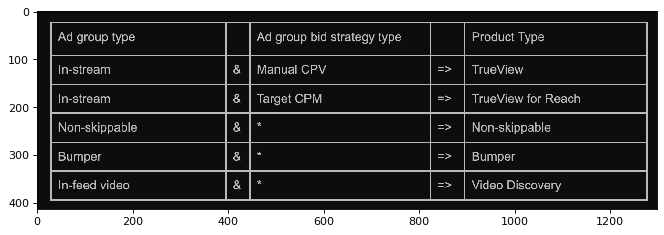

In [7]:
# Import the table image

%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
img = mpimg.imread('/Users/thomasmulhern/Desktop/ScreenShot2022-08-12at6.54.07PM.png')
plt.imshow(img)

In [8]:
# First Way 

df.groupby(['Ad group type','Ad group bid strategy type']).size().to_frame('Product Type')

Product Type
Ad group type Ad group bid strategy type              
Bumper        Target CPM                         48860
In-feed video Manual CPV                         14656
In-stream     Manual CPV                        229743
              Target CPM                         16131
Non-skippable Target CPM                         57812

In [9]:
# A second way

bumper = len(df.where(df['Ad group type']=='Bumper').where(df['Ad group bid strategy type']=='Target CPM').dropna())
video_discovery = len(df.where(df['Ad group type']=='In-feed video').where(df['Ad group bid strategy type']=='Manual CPV').dropna())
trueView = len(df.where(df['Ad group type']=='In-stream').where(df['Ad group bid strategy type']=='Manual CPV').dropna())
trueView_for_reach = len(df.where(df['Ad group type']=='In-stream').where(df['Ad group bid strategy type']=='Target CPM').dropna())
non_skippable = len(df.where(df['Ad group type']=='Non-skippable').where(df['Ad group bid strategy type']=='Target CPM').dropna())

print(f'''TrueView: {trueView}, 
TrueView For Reach: {trueView_for_reach}, 
Non-Skippable: {non_skippable}, 
Bumper: {bumper}, 
Video Discovery: {video_discovery}''')

TrueView: 229743, 
TrueView For Reach: 16131, 
Non-Skippable: 57812, 
Bumper: 48860, 
Video Discovery: 14656


In [10]:
# Here is the data in a pandas Series (column)

product_type = pd.Series([trueView, trueView_for_reach, non_skippable, bumper, video_discovery])
product_type

0    229743
1     16131
2     57812
3     48860
4     14656
dtype: int64

# Question 2
For TrueView products in Q1 (Jan 1 - March 31), what day and campaign had the most views.

Provide the campaign, day, and view count. Your submission for this question will include 1) The python code you used to obtain your solution. 2) The returned result.

In [11]:
# Nrw variables pointing to df so we can test different methods for foverting to datetime

df2 = df
df3 = df

In [12]:
# More common but slower way to convert strings to datetimes using Pandas apply
df2['Day'] = df['Day'].apply(lambda x: pd.to_datetime(x))

# Faster method using numpy vectorization (~1369x faster)
import numpy as np
df3['Day'] = df3['Day'].values.astype(np.datetime64)

In [13]:
# Testing the speed of each

%timeit df2['Day'] = df['Day'].apply(lambda x: pd.to_datetime(x))
%timeit df3['Day'] = df3['Day'].values.astype(np.datetime64)

2.18 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.96 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
# Get all the rows in Jan - Mar
dfq1 = df3[(df3['Day'].dt.month == 1) | (df3['Day'].dt.month == 2) | (df3['Day'].dt.month == 3)]
dfq1.head()

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks
35,2022-03-01,AV_Bonus Impressions_Q4'21-Q2'22 PL036669_ Non...,CAA,Non-skippable,Target CPM,0.82,0.0,111.0,0.0
38,2022-02-15,YT_Bumpers_Q1'22 PL024621,CIA,Bumper,Target CPM,19.53,0.0,3433.0,2.0
39,2022-03-28,AV_Bonus Impressions_Q4'21-Q2'22 PL036669_TV4R,kw - coffee consumers,In-stream,Target CPM,0.07,0.0,9.0,0.0
41,2022-02-15,CF After Dark - TrueView In-Stream - Conscious...,Remarketing,In-stream,Manual CPV,166.64,7057.0,17034.0,74.0
42,2022-01-13,YT_Non-Skip15_Q1'22 PL024616,LE,Non-skippable,Target CPM,4.39,0.0,489.0,1.0


In [15]:
dfq1_tv = dfq1.where(df['Ad group type']=='In-stream').where(df['Ad group bid strategy type']=='Manual CPV').dropna()


In [16]:
dfq1_tv

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks
41,2022-02-15,CF After Dark - TrueView In-Stream - Conscious...,Remarketing,In-stream,Manual CPV,166.64,7057.0,17034.0,74.0
44,2022-03-27,YT TrV USA PL042588 V0uyefVpwuw,Affinities,In-stream,Manual CPV,7.57,47.0,60.0,0.0
105,2022-03-30,CF After Dark - TrueView - Conscious Conversat...,DD&LE,In-stream,Manual CPV,34.57,1674.0,2719.0,8.0
115,2022-03-28,YT TrV USA PL042588 V0uyefVpwuw,Affinities,In-stream,Manual CPV,0.27,2.0,2.0,0.0
190,2022-03-27,YT TrV USA PL042588 MHogPnUWjMM,CAA,In-stream,Manual CPV,0.10,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
367171,2022-03-16,YT_TrV_CV_AA PL036571 - English - CTV,AA Conscious Positive,In-stream,Manual CPV,1.04,50.0,102.0,0.0
367175,2022-03-23,YT_TrV_Chicago PL039969 - ENG,Video Lineups - MC,In-stream,Manual CPV,0.29,22.0,37.0,0.0
367181,2022-03-02,YT_TrV_SF PL039984 - SPA,KW,In-stream,Manual CPV,22.15,1613.0,2237.0,4.0
367185,2022-03-17,YT_TrV_Denver PL039976 - ENG,Video Lineups - MC,In-stream,Manual CPV,0.27,18.0,27.0,0.0


In [17]:
from datetime import datetime
pc = dfq1_tv[dfq1_tv['Views'] == dfq1_tv['Views'].max()]['Campaign'].iloc[0]
pd = dfq1_tv[dfq1_tv['Views'] == dfq1_tv['Views'].max()]['Day'].iloc[0]

print(f"""For TrueView products in Q1 (Jan 1 - March 31) the date: 

{pd.year}-{pd.month}-{pd.day} 

and the campaign: 

{pc} 

had the most views.""")

For TrueView products in Q1 (Jan 1 - March 31) the date: 

2022-2-4 

and the campaign: 

YT_TrV_US_Q1'22 FEB PL034029 - Feeling It All  - TAB/CTV 

had the most views.


# Question 3
Create two new columns, 'cpv' & 'cpm'. Fill the columns using the below formulas. Calculate and provide the averages for the new columns, 'cpv' and 'cpm' for each product type.

cpv = 'Cost'/'Views'

cpv = ('Cost'/'Impr.') * 1000

 

If  'Ad group bid strategy type'  =  'Manual CPV'  -> cpv formula

If  'Ad group bid strategy type'  =  'Target CPM'  -> cpm formula



In [18]:
# Create CPV column

df3['cpv'] = df3.apply(lambda row: np.nan if row.Views == 0 else row.Cost / row.Views, axis=1)

In [19]:
# Create CPM column

df3['cpm'] = df3.apply(lambda row: np.nan if row['Impr.'] == 0 else (row.Cost / row['Impr.'])*1000, axis=1)

In [20]:

# Calculate averages

bumper1 = np.mean(df3.where(df3['Ad group type']=='Bumper').where(df3['Ad group bid strategy type']=='Target CPM'))
video_discovery1 = np.mean(df3.where(df['Ad group type']=='In-feed video').where(df3['Ad group bid strategy type']=='Manual CPV'))
trueView1 = np.mean(df3.where(df3['Ad group type']=='In-stream').where(df3['Ad group bid strategy type']=='Manual CPV'))
trueView_for_reach1 = np.mean(df3.where(df['Ad group type']=='In-stream').where(df3['Ad group bid strategy type']=='Target CPM'))
non_skippable1 = np.mean(df3.where(df3['Ad group type']=='Non-skippable').where(df3['Ad group bid strategy type']=='Target CPM'))


In [21]:
# Explore/confirm Non-skippable cpv = 0

len(df3['cpv'].where(df3['Ad group type']=='Non-skippable').where(df3['Ad group bid strategy type']=='Target CPM').dropna())

0

In [22]:
# Output cpm and cpv for each product

print(f"""Bumper cpm: {np.round(bumper1['cpm'], 3)}, Bumper cpv: {0}
Non-skippable cpm: {np.round(non_skippable1['cpm'],3)}, Non-skippable cpv:{0}
Video Discovery cpm: {np.round(video_discovery1['cpm'],3)}, Video Discovery cpv: {np.round(video_discovery1['cpv'],3)}
TrueView cpm:{np.round(trueView1['cpm'],3)}, TrueView cpv: {np.round(trueView1['cpv'],3)}
TrueView for Reach cpm:{np.round(trueView_for_reach1['cpm'],3)}, TrueView for Reach cpv: {np.round(trueView_for_reach1['cpv'],3)}""")

Bumper cpm: 5.166, Bumper cpv: 0
Non-skippable cpm: 11.345, Non-skippable cpv:0
Video Discovery cpm: 1.103, Video Discovery cpv: 0.071
TrueView cpm:10.043, TrueView cpv: 0.017
TrueView for Reach cpm:8.386, TrueView for Reach cpv: 0.057


# Question 4
Based on this data set, we'd like to see what insights, or trends you are able to analyze. You are free to use whatever means necessary to complete this step, python is not required for this step. 

## Next Steps:
#### •Investigate and visualize cpc, cpi, and cpc seasonality
#### •Create tables with the best and worst performing campaigns, ad groups, and ad group types by cpc, cpv, and cpi
#### •Create Tableau dashboard to connect to db from which this data came for live results
